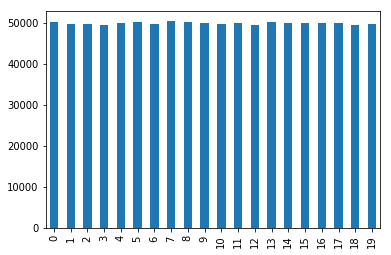

In [1]:

# MCMC for uniform distribution as stationary distribution

%matplotlib inline 


import networkx as nx
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

G=nx.powerlaw_cluster_graph(20, 7, 0.3, seed=654) 
G=nx.Graph(G) 
G.remove_edges_from(G.selfloop_edges()) 


T = 1000000
def accept(x, y):
    accept_prob = min(1, len(list(G.neighbors(x))) / len(list(G.neighbors(y))))
    # acceptance probability: min(1, deg(x) / deg(y) )
    return 1 == np.random.binomial(1, accept_prob)
    
def simple_walk_from(x):
    candidate = random.choice(list(G.neighbors(x))) 
    # sample uniformly among neighbors of x
    if accept(x, candidate):
        return candidate
    else:
        return x
    
def run_chain_starting_from(x_zero):
    visited_nodes = []
    current_node = x_zero
    for i in range(T):
        visited_nodes.append(current_node)
        current_node = simple_walk_from(current_node)
    return visited_nodes
        
# Run the Markov chain   
from collections import Counter
counts = Counter(run_chain_starting_from(18))

# Draw histogram
def counts_of_time_node_was_visited(node):
    return counts[node]

def simple_walk_stationary_distribution(node):
    return G.degree(node)/float(2*len(G.edges()))
                                
    
data = dict( (
                node, (
                    counts_of_time_node_was_visited(node), # first column
                    simple_walk_stationary_distribution(node)) # second column
             )
            for node in G.nodes())
df = pd.DataFrame(data).transpose()
df = df[0]
df.plot(kind="bar")




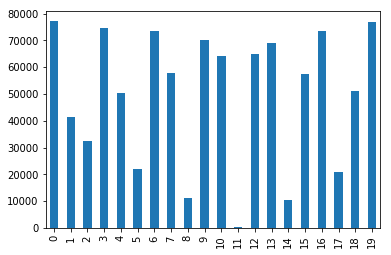

In [2]:


# MCMC for pi(x) = |cos(i)|/Z


%matplotlib inline 

import networkx as nx
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import math

G=nx.powerlaw_cluster_graph(20, 7, 0.3, seed=654) 
G=nx.Graph(G) 
G.remove_edges_from(G.selfloop_edges()) 

    
T = 1000000
def accept(x, y):
    accept_prob = min(1, 
                      abs(math.cos(y)) * len(list(G.neighbors(x))) / 
                      (abs(math.cos(x)) * len(list(G.neighbors(y))))
                      )
    # acceptance probability: min(1, pi(y)*deg(x) / pi(x)*deg(y) )

    return 1 == np.random.binomial(1, accept_prob)
    
def simple_walk_from(x):
    candidate = random.choice(list(G.neighbors(x)))
    # sample uniformly among neighbors of x
    if accept(x, candidate):
        return candidate
    else:
        return x
    
def run_chain_starting_from(x_zero):
    visited_nodes = []
    current_node = x_zero
    for i in range(T):
        visited_nodes.append(current_node)
        current_node = simple_walk_from(current_node)
    return visited_nodes

# Run the Markov chain      
from collections import Counter
counts = Counter(run_chain_starting_from(18))

# Draw histogram
def counts_of_time_node_was_visited(node):
    return counts[node]

def simple_walk_stationary_distribution(node):
    return G.degree(node)/float(2*len(G.edges()))
                                
data = dict( (
                node, (
                    counts_of_time_node_was_visited(node), # first column
                    simple_walk_stationary_distribution(node)) # second column
             )
            for node in G.nodes())
df = pd.DataFrame(data).transpose()
df = df[0]
df.plot(kind="bar")




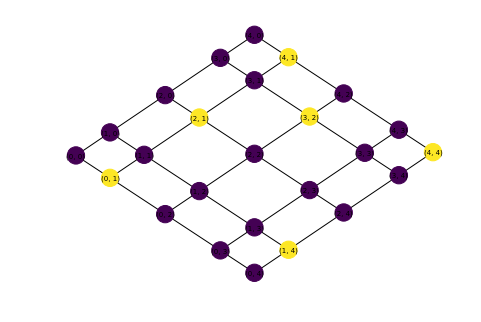

In [3]:

# Glauber dynamics on hardcore configurations.

%matplotlib inline 


import networkx as nx
import numpy as np
import random


L = 5
G=nx.grid_2d_graph(L,L)


# Do the neighbors of a node have a particle?
def test_neighbors(node):
    if any([1 == particles[node] for node in G.neighbors(node) ]):
        return True
    else:
        return False
 

particles = dict( (node, 0) for node in G.nodes()) # dicitonary to store particle locations
particles[(0,0)] = 1 # put a particle at node (0,0)

def run_chain(x):
    for i in range(T):
        n = random.choice(list(G.nodes()))
        if test_neighbors(n) == False:
            x[n] = random.choice([0,1])
    return x


T=1000
particles = run_chain(particles)    
nx.draw(G, with_labels=True, pos=nx.layout.spectral_layout(G), font_size=7, node_color=[particles[node] for node in G.nodes()])
    
    

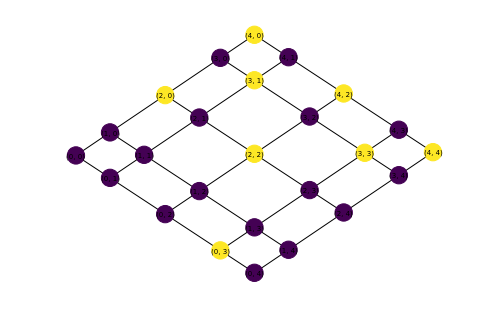

In [4]:
T=100000
particles = dict( (node, 0) for node in G.nodes()) # dicitonary to store particle locations
particles[(0,0)] = 1 # put a particle at node (0,0)

particles = run_chain(particles)    
nx.draw(G, with_labels=True, pos=nx.layout.spectral_layout(G), font_size=7, node_color=[particles[node] for node in G.nodes()])
    